In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Data_Science\Jigsaw Academy\ML\data_files\credit_history.csv")

In [3]:
dataset

default  amount grade  years ownership   income  age
0           0    1000     B    2.0      RENT  19200.0   24
1           1    6500     A    2.0  MORTGAGE  66000.0   28
2           0    2400     A    2.0      RENT  60000.0   36
3           0   10000     C    3.0      RENT  62000.0   24
4           1    4000     C    2.0      RENT  20000.0   28
...       ...     ...   ...    ...       ...      ...  ...
7722        1    6000     C    6.0      RENT  47628.0   24
7723        1    1500     B    5.0      RENT  18000.0   21
7724        1    4100     B   18.0      RENT  57000.0   26
7725        1    2000     B    NaN      RENT  25000.0   25
7726        1    6000     C    0.0      RENT  45000.0   25

[7727 rows x 7 columns]

In [6]:
dataset.head(10)

default  amount grade  years ownership   income  age
0        0    1000     B    2.0      RENT  19200.0   24
1        1    6500     A    2.0  MORTGAGE  66000.0   28
2        0    2400     A    2.0      RENT  60000.0   36
3        0   10000     C    3.0      RENT  62000.0   24
4        1    4000     C    2.0      RENT  20000.0   28
5        1    5000     A    2.0      RENT  12000.0   27
6        1    6000     C    1.0      RENT  48000.0   23
7        0    5000     D    2.0      RENT  40000.0   21
8        0    4200     A    6.0      RENT  60000.0   29
9        0   12000     A    4.0  MORTGAGE  85000.0   22

In [7]:
dataset.isnull().sum()
# for checking if there are any null values-
# here only the years column has 279 null values and there are no null (0) c=values in all the columns

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [8]:
dataset.shape

(7727, 7)

In [10]:
dataset.describe()

default        amount        years        income          age
count  7727.000000   7727.000000  7448.000000  7.727000e+03  7727.000000
mean      0.478452   9453.345412     6.086332  6.337197e+04    27.542125
std       0.499568   6298.595800     6.700758  4.687195e+04     6.132121
min       0.000000    500.000000     0.000000  4.000000e+03    20.000000
25%       0.000000   5000.000000     2.000000  3.700000e+04    23.000000
50%       0.000000   8000.000000     4.000000  5.400000e+04    26.000000
75%       1.000000  12000.000000     8.000000  7.679650e+04    30.000000
max       1.000000  35000.000000    62.000000  1.200000e+06    94.000000

In [7]:
dataset.describe().T

count          mean           std     min      25%      50%  \
default  7727.0      0.478452      0.499568     0.0      0.0      0.0   
amount   7727.0   9453.345412   6298.595800   500.0   5000.0   8000.0   
years    7448.0      6.086332      6.700758     0.0      2.0      4.0   
income   7727.0  63371.969622  46871.950549  4000.0  37000.0  54000.0   
age      7727.0     27.542125      6.132121    20.0     23.0     26.0   

             75%        max  
default      1.0        1.0  
amount   12000.0    35000.0  
years        8.0       62.0  
income   76796.5  1200000.0  
age         30.0       94.0

In [8]:
# target variable
dataset['default'].value_counts(normalize=True)
# 0 - default
# 1 - non-default

0    0.521548
1    0.478452
Name: default, dtype: float64

# Data Pre-processing-

In [9]:
# missing values - years
dataset['years'].fillna(dataset['years'].median(),inplace=True)

In [10]:
dataset1 = dataset.copy()
dataset1 = pd.get_dummies(dataset1,drop_first=True) # one-hot encoding
dataset1.head()

default  amount  years   income  age  grade_B  grade_C  grade_D  grade_E  \
0        0    1000    2.0  19200.0   24        1        0        0        0   
1        1    6500    2.0  66000.0   28        0        0        0        0   
2        0    2400    2.0  60000.0   36        0        0        0        0   
3        0   10000    3.0  62000.0   24        0        1        0        0   
4        1    4000    2.0  20000.0   28        0        1        0        0   

   grade_F  grade_G  ownership_OTHER  ownership_OWN  ownership_RENT  
0        0        0                0              0               1  
1        0        0                0              0               0  
2        0        0                0              0               1  
3        0        0                0              0               1  
4        0        0                0              0               1

By default, this is set to drop_first = False . This will cause get_dummies to create one dummy variable for every level of the input categorical variable. If you set drop_first = True , then it will drop the first category. So if you have K categories, it will only produce K – 1 dummy variables.

In [11]:
dataset1.drop_duplicates(inplace=True)

In [12]:
dataset1.shape

(7332, 14)

In [13]:
X = dataset1.drop('default' , axis=1) #input features
y = dataset1['default'] #target variable

# Explore with pre-processing techniques

In [14]:
X.head()

amount  years   income  age  grade_B  grade_C  grade_D  grade_E  grade_F  \
0    1000    2.0  19200.0   24        1        0        0        0        0   
1    6500    2.0  66000.0   28        0        0        0        0        0   
2    2400    2.0  60000.0   36        0        0        0        0        0   
3   10000    3.0  62000.0   24        0        1        0        0        0   
4    4000    2.0  20000.0   28        0        1        0        0        0   

   grade_G  ownership_OTHER  ownership_OWN  ownership_RENT  
0        0                0              0               1  
1        0                0              0               0  
2        0                0              0               1  
3        0                0              0               1  
4        0                0              0               1

# Model-building

In [15]:
# Train-Test split - 
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)
## to maintain the same number of 0's and 1's in the training and test data, stratify is used- for equal division
## same set of data will be taken everytime - random_state
# 20% test data
# 80% train data
# xtrain - i/p features for train data
# xtest - i/p features of test data
# ytrain - target variable for train data
# ytest - actual target variable for test data

In [17]:
xtrain.head()

amount  years    income  age  grade_B  grade_C  grade_D  grade_E  \
475    21600    2.0   58600.0   27        0        0        1        0   
7044   12000   21.0   48686.0   36        0        0        1        0   
7280   23800    5.0  102000.0   24        0        0        0        0   
5488   10000    1.0   46000.0   29        0        1        0        0   
6244    1500   11.0   58000.0   36        1        0        0        0   

      grade_F  grade_G  ownership_OTHER  ownership_OWN  ownership_RENT  
475         0        0                0              0               0  
7044        0        0                0              0               1  
7280        0        0                0              1               0  
5488        0        0                0              0               1  
6244        0        0                0              0               0

In [18]:
# xtrain shape
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

xtrain shape(5865, 13)
xtest shape(1467, 13)
ytrain shape(5865,)
ytest shape(1467,)


In [19]:
ytrain.value_counts(normalize=True)

1    0.502472
0    0.497528
Name: default, dtype: float64

In [20]:
ytest.value_counts(normalize=True)

1    0.502386
0    0.497614
Name: default, dtype: float64

# Decision-Tree Classifier

In [21]:
# build Decision Tree classifier using sklearn
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf = DecisionTreeClassifier()

In [23]:
# training i/p and o/p - decision tree
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [24]:
# yactual
ytest.head()

1649    1
6614    1
1166    1
117     0
198     1
Name: default, dtype: int64

In [25]:
# ypredicted
ypred = clf.predict(xtest)

In [26]:
ypred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [27]:
ypred1 = pd.DataFrame(ypred) # predicted data
ypred1.head()

0
0  1
1  0
2  0
3  1
4  0

In [28]:
# training accuracy
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,plot_confusion_matrix

C:\Users\shivantripathi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


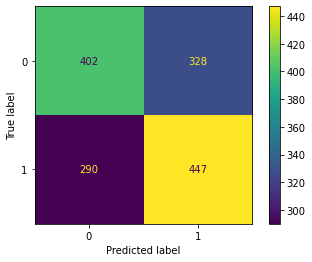

In [29]:
# confusion matrix - 

plot_confusion_matrix(clf,xtest,ytest)
# True-positive - 1,1
# True negative - 0,0
# False positive - 0,1
# False negative - 1,0 - certain values are falsely classified as negative but are actually positive

In [30]:
# accuracy-score
accuracy_score(ytest,ypred)

0.5787321063394683

In [31]:
# precision-score
precision_score(ytest,ypred)

0.5767741935483871

In [32]:
# recall-score
recall_score(ytest,ypred) # this is (yactual,ypredicted)

0.6065128900949797

In [33]:
clf_prob = clf.predict_proba(xtest)[:,1] # this column will give the probabilities
clf_prob

array([1. , 0. , 0.5, ..., 0. , 1. , 0. ])

In [34]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

In [35]:
# building decision-tree at the end is not a good option

Text(0, 0.5, 'True Positive Rate')

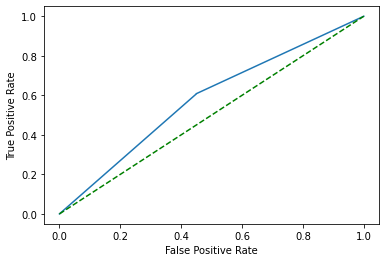

In [36]:
fpr,tpr,threshold=roc_curve(ytest,clf_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color='green',ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [37]:
roc_auc_score(ytest,clf_prob)

0.5789725098046505

# until now we have checked the accuracy of the test data, now we will test the accuracy score of the trained data

In [38]:
# checking the accuracy score of the Trained data - 

ypred_train = clf.predict(xtrain)

In [39]:
accuracy_score(ytrain,ypred_train)
# very good accuracy score (99.9%)

0.9996589940323956

# Pruning

In [40]:
clf1 = DecisionTreeClassifier(max_depth=4,min_samples_leaf=10)

In [41]:
clf1

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [42]:
clf1.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [43]:
# predicting on test data by 2nd model clf1
ypred1 = clf1.predict(xtest)

In [44]:
ypred1

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
list(xtrain.columns.values)

['amount',
 'years',
 'income',
 'age',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'ownership_OTHER',
 'ownership_OWN',
 'ownership_RENT']

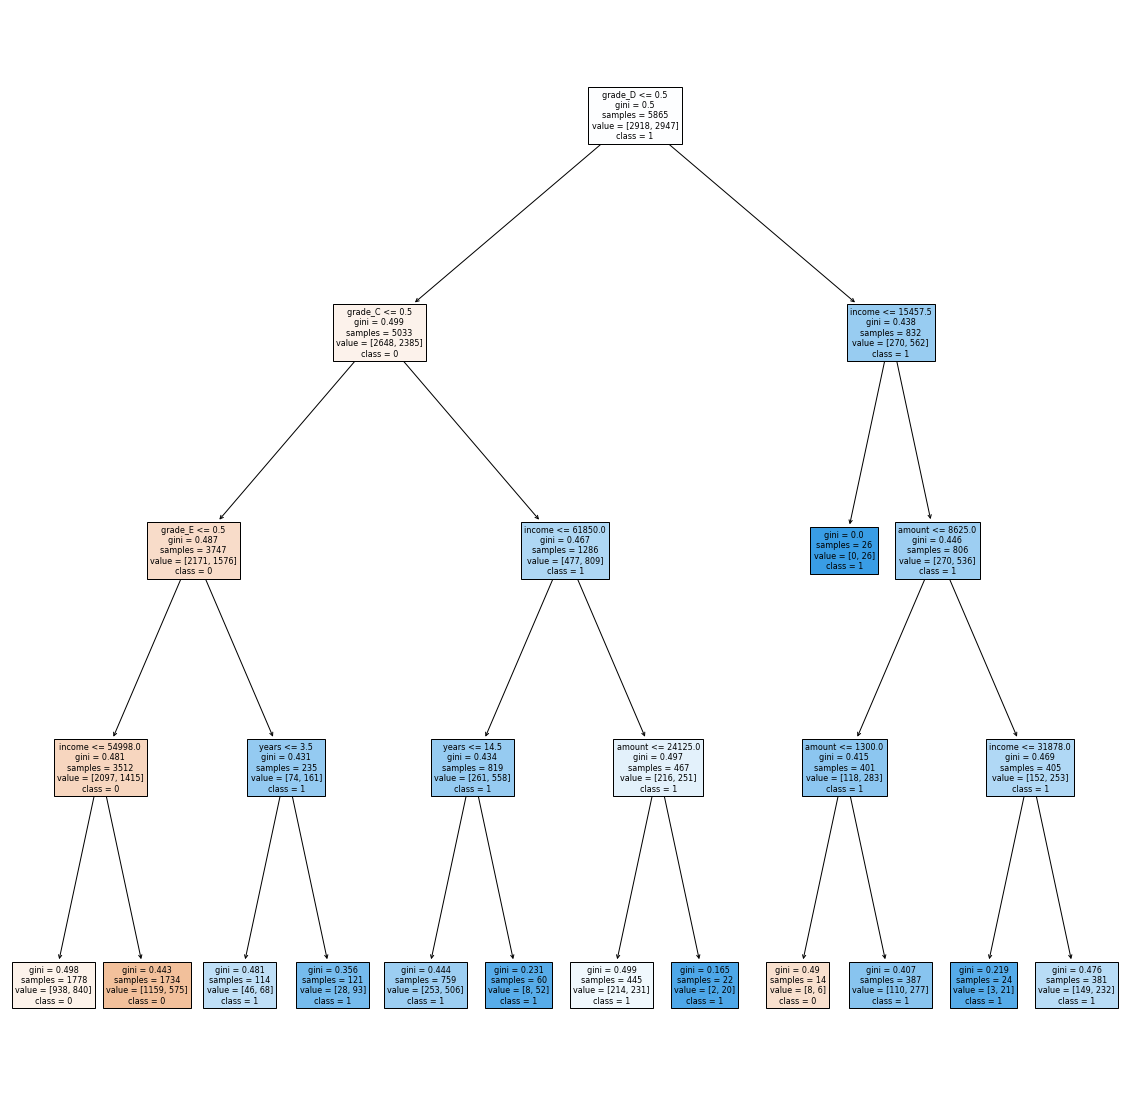

In [46]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf1,feature_names=list(xtrain.columns.values),class_names=['0','1'],filled=True);

In [47]:
treerules = tree.export_text(clf1,feature_names=list(xtrain.columns.values))
print(treerules)

|--- grade_D <= 0.50
|   |--- grade_C <= 0.50
|   |   |--- grade_E <= 0.50
|   |   |   |--- income <= 54998.00
|   |   |   |   |--- class: 0
|   |   |   |--- income >  54998.00
|   |   |   |   |--- class: 0
|   |   |--- grade_E >  0.50
|   |   |   |--- years <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- years >  3.50
|   |   |   |   |--- class: 1
|   |--- grade_C >  0.50
|   |   |--- income <= 61850.00
|   |   |   |--- years <= 14.50
|   |   |   |   |--- class: 1
|   |   |   |--- years >  14.50
|   |   |   |   |--- class: 1
|   |   |--- income >  61850.00
|   |   |   |--- amount <= 24125.00
|   |   |   |   |--- class: 1
|   |   |   |--- amount >  24125.00
|   |   |   |   |--- class: 1
|--- grade_D >  0.50
|   |--- income <= 15457.50
|   |   |--- class: 1
|   |--- income >  15457.50
|   |   |--- amount <= 8625.00
|   |   |   |--- amount <= 1300.00
|   |   |   |   |--- class: 0
|   |   |   |--- amount >  1300.00
|   |   |   |   |--- class: 1
|   |   |--- amount >  8625.00
|   | 

In [53]:
# Feature importances
feat_imp = clf1.feature_importances_
pd.Series(feat_imp,index=list(xtrain.columns.values)).sort_values(ascending=True)
# it is wrt this decision tree that these features were important
# these attributes are playing a role in predicting the value
# 0 value variables is not a good feature

age                0.000000
grade_B            0.000000
grade_F            0.000000
grade_G            0.000000
ownership_OTHER    0.000000
ownership_OWN      0.000000
ownership_RENT     0.000000
years              0.031512
amount             0.044740
grade_E            0.139488
income             0.222588
grade_D            0.230769
grade_C            0.330903
dtype: float64

In [56]:
accuracy_score(ytest,ypred1)
# here now the accuracy is 60.1%

0.6053169734151329

# Grid Search algorithm for choosing the best parameters (Hyperparameter Selection)

In [59]:
from sklearn.model_selection import GridSearchCV

In [64]:
mod = GridSearchCV(clf,param_grid={'max_depth': [i for i in range (3,10)], 
                                   'max_leaf_nodes': [i for i in range(5,15)], 
                                   'min_samples_leaf': [i for i in range (10,200,5)]}, cv=10)

In [65]:
# max_depth=3,max_leaf_nodes=5,min_samples_leaf- 10 to 200 in steps of 5
# for i in range(3,10):
#    for j in range (5,15):
#        for k in range(10,200,5)

In [66]:
mod.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95, 100, 105, 110, 115, 120,
                                              125, 130, 135, 140, 145, 150, 155, ...]})

In [67]:
# checking best model
mod.best_estimator_

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=14, min_samples_leaf=10)

In [68]:
# checking best accuracy score
mod.best_score_

0.6383700309899937

In [69]:
clf_grid = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=14, min_samples_leaf=10)
clf_grid.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=14, min_samples_leaf=10)

In [70]:
y_pred_grid = clf_grid.predict(xtest)

In [71]:
accuracy_score(ytest,y_pred_grid)

0.6134969325153374

In [73]:
y_pred_train_grid = clf_grid.predict(xtrain) # training accuracy
accuracy_score(ytest,y_pred_grid)
# Train and test accuracy very close - model is not over-fitting

0.6134969325153374

In [75]:
clf_grid.predict_proba(xtest)[:,1]

array([0.8       , 0.68131868, 0.53368421, ..., 0.31849315, 0.53368421,
       0.31849315])

In [74]:
roc_auc_score(ytest,clf_grid.predict_proba(xtest)[:,1])

0.6655062173565548

# Decision-Tree Regression Model